# Understanding Sampling
I will use this notebook to understand sampling methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Inversion method
For an exponential distribution, the probability density function is,

$$ f(x) = \begin{cases} ae^{-ax} & x \geq 0 \\ 0 & x < 0 \end{cases} $$

The distribution function is analytic,

$$ F(\eta) = \int_0^\eta f(x) dx = \begin{cases} 1 - e^{-a\eta} & \eta \geq 0 \\ 0 & \eta < 0 \end{cases} $$

So we will sample $\xi \sim U(0,1)$, and $\eta = F^{-1}(\xi) = \frac{-1}{a}\log(1-\xi)$ will have the required distribution.

Text(0,0.5,'Prob. Density')

<Figure size 432x288 with 0 Axes>

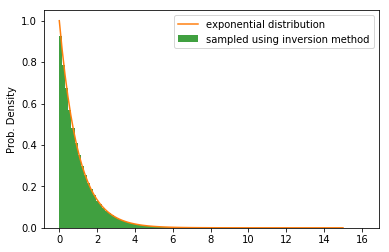

In [3]:
num_samples = 10**6
xi_vec = np.random.uniform(0,1,num_samples)
plt.figure(1)
#plt.hist(xi_vec,bins=100,density=True,facecolor="g",alpha=0.75,histtype="stepfilled")
#plt.ylabel("Prob. Density")

a = 1
eta_vec = (-1/a)*np.log(1 - xi_vec) 
plt.figure(2)
x_vec = np.linspace(0,15,100)
plt.hist(eta_vec,bins=100,density=True,facecolor="g",alpha=0.75,histtype="stepfilled",label="sampled using inversion method")
plt.plot(x_vec,a*np.exp(-a*x_vec),label="exponential distribution")
plt.legend()
plt.ylabel("Prob. Density")

## Box Muller algorithm
This is used to generate two i.i.d Gaussian random variables ($\eta_1,\eta_2) \sim \mathcal{N}(0,\sigma^2)$. If $\xi_1,\xi_2 \sim U(0,1)$, then

$$ 
\begin{align*}
\eta_1 &= \sqrt{-2\sigma^2\log(\xi_1)}\cos(2\pi \xi_2) \\
\eta_2 &= \sqrt{-2\sigma^2\log(\xi_1)}\sin(2\pi \xi_2) 
\end{align*}
$$

Text(0,0.5,'Prob. Density')

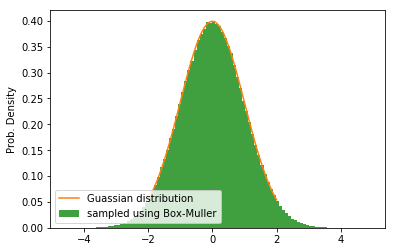

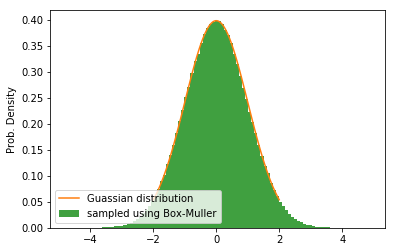

In [15]:
num_samples = 10**6
xi_1_vec = np.random.uniform(0,1,num_samples)
xi_2_vec = np.random.uniform(0,1,num_samples)

sigma = 1
eta_1 = np.sqrt(-2*sigma**2*np.log(xi_1_vec))*np.cos(2*np.pi*xi_2_vec)
eta_2 = np.sqrt(-2*sigma**2*np.log(xi_1_vec))*np.sin(2*np.pi*xi_2_vec)

plt.figure(1)
x_vec = np.linspace(-2,2,100)
gauss = (1.0/np.sqrt(2*np.pi*sigma**2))*np.exp(-x_vec**2/(2*sigma**2))
plt.hist(eta_1,bins=100,density=True,facecolor="g",alpha=0.75,histtype="stepfilled",label="sampled using Box-Muller")
plt.plot(x_vec,gauss,label="Guassian distribution")
plt.legend()
plt.ylabel("Prob. Density")

plt.figure(2)
plt.hist(eta_2,bins=100,density=True,facecolor="g",alpha=0.75,histtype="stepfilled",label="sampled using Box-Muller")
plt.plot(x_vec,gauss,label="Guassian distribution")
plt.legend()
plt.ylabel("Prob. Density")

## Acceptance Rejection Method
Assume we want to generate samples from a pdf $f(x)$ and a pdf $g(x)$ which we can sample from. Also, 
$$ \sup_x \frac{f(x)}{g(x)} = c < \infty $$

Then, the acceptance-rejection method to sample $X = x$ is:

1. Sample $y \sim g(Y)$ and $u \sim \mathcal{U}[0,1]$

2. If $u < \frac{f(y)}{cg(y)}$, set $x = y$, else goto 1.

### Example 1: Sampling Gaussian from exponential RV
